In [5]:
from sklearn.covariance import GraphicalLasso, GraphicalLassoCV
from sklearn.preprocessing import StandardScaler

from drn_interactions.load import load_spikes, load_neurons, load_clusters
from drn_interactions.transforms import bin_spikes
from scipy.stats import zscore
from pathlib import Path
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


np.random.seed(42)

In [2]:
df_spikes = load_spikes("pre")

neurons = load_neurons()

In [3]:
def get_session_binned_spikes(df_spikes, df_neurons, session_name, bin_width, t_max=1800):
    df_spikes = df_spikes.copy()
    session_neurons = df_neurons.loc[lambda x: x.session_name == session_name]["neuron_id"].unique()
    df_spikes = df_spikes.loc[lambda x: x.neuron_id.isin(session_neurons)]
    if t_max is not None:
        df_spikes = df_spikes.loc[lambda x: x.spiketimes < t_max]
    return bin_spikes(df_spikes, bin_width=bin_width, t_max=t_max, t_before=0).pivot(columns="neuron_id", values="counts", index="bin")
     

ESHOCK_04_LOC1
ESHOCK_03_LOC1
ESHOCK_04_LOC1
ESHOCK_06_LOC1
ESHOCK_07_LOC1
ESHOCK_08_LOC1
ESHOCK_09_LOC1
hamilton_10
hamilton_03
hamilton_04
hamilton_09
hamilton_31
hamilton_38
hamilton_37
hamilton_35
hamilton_36
hamilton_32
acute_15
acute_16
acute_01
acute_14
acute_12
acute_11


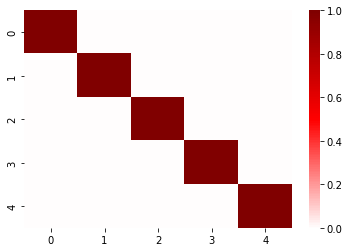

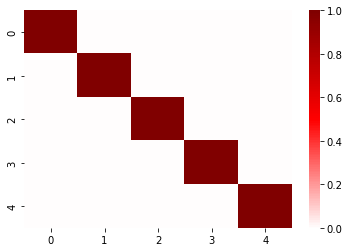

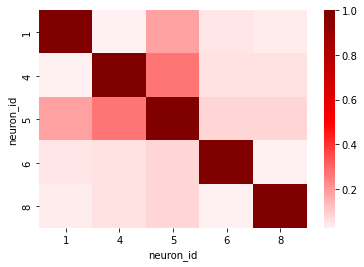

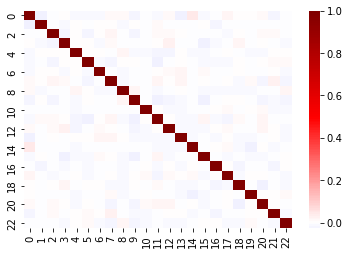

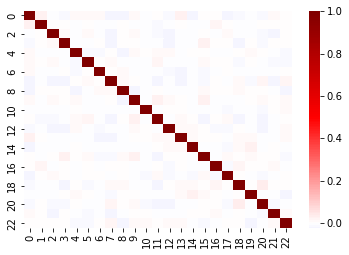

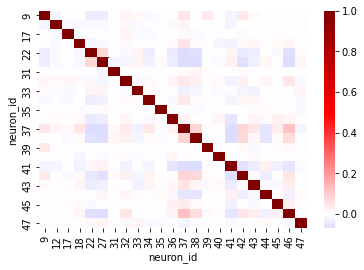

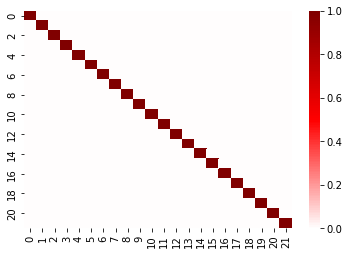

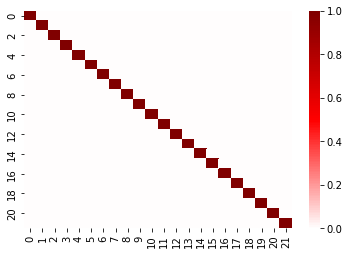

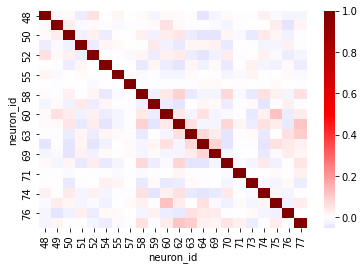

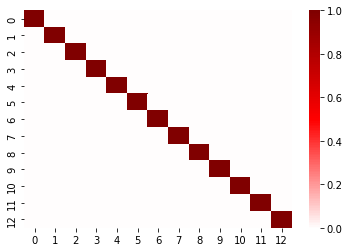

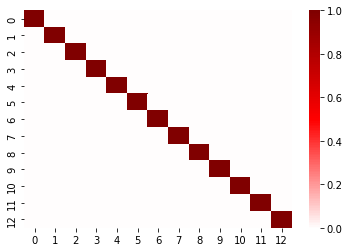

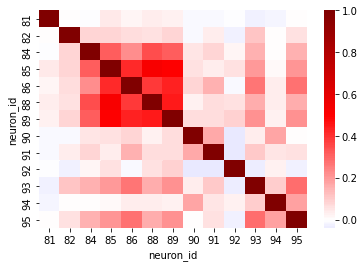

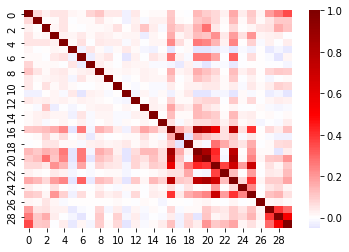

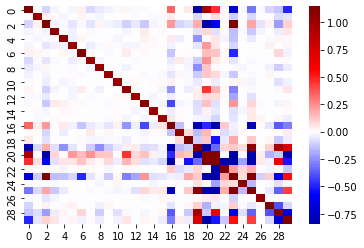

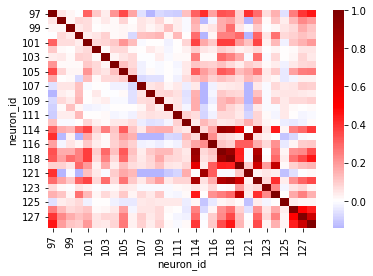

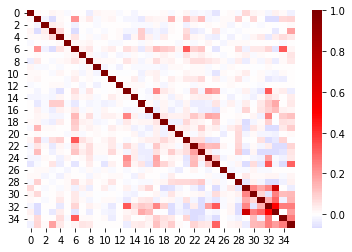

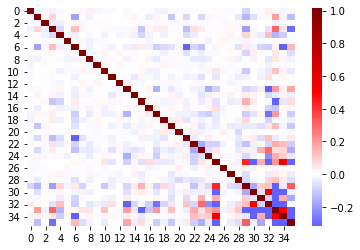

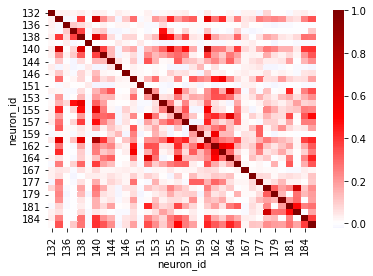

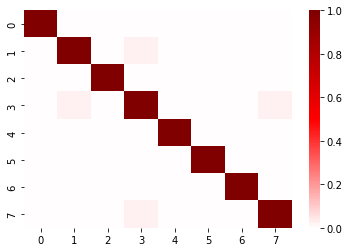

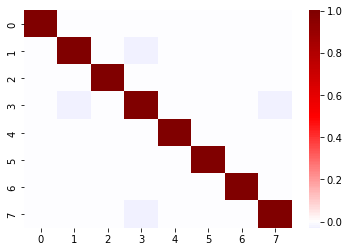

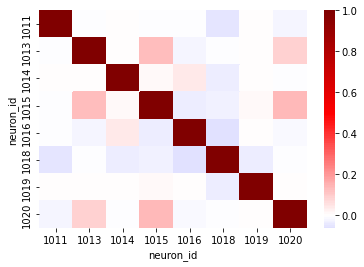

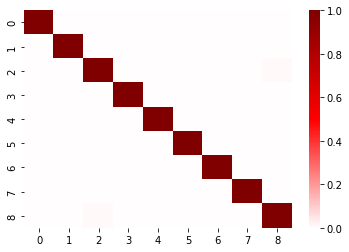

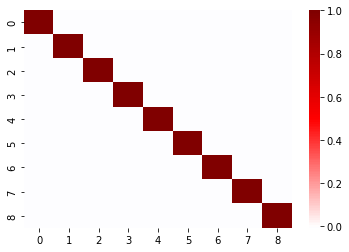

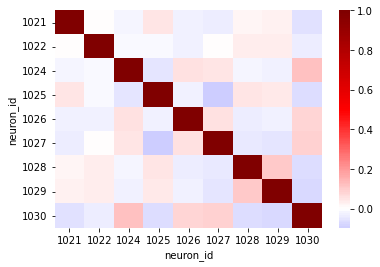

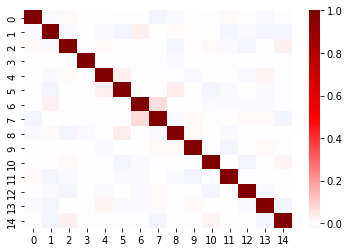

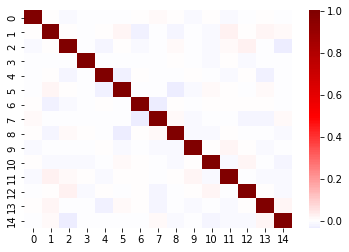

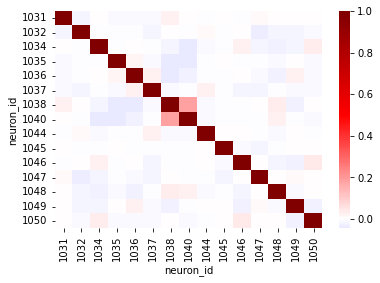

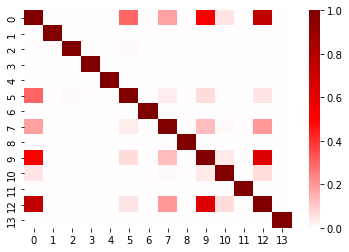

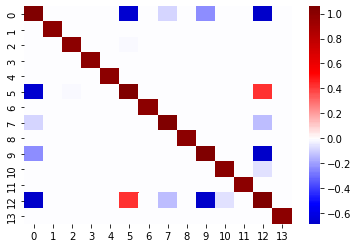

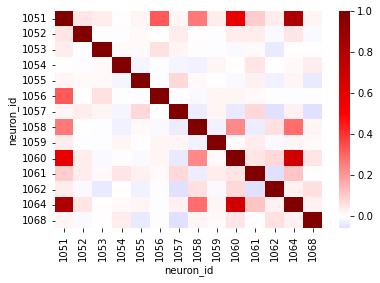

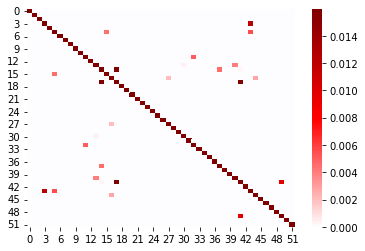

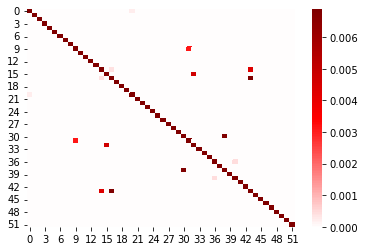

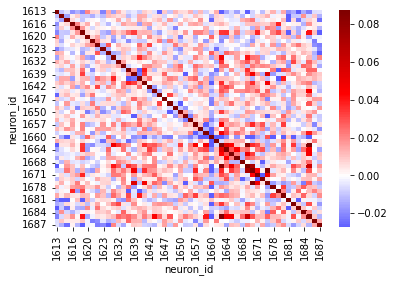

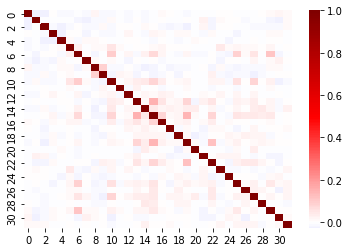

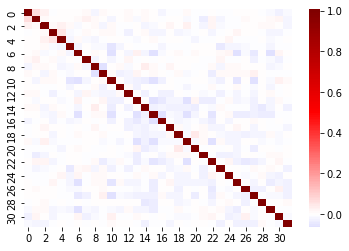

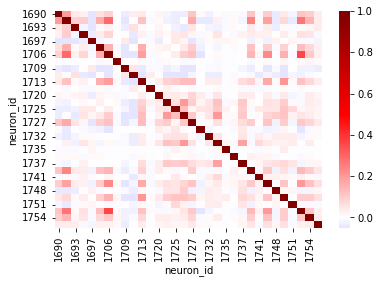

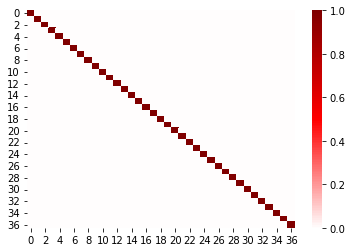

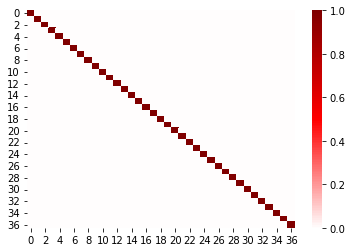

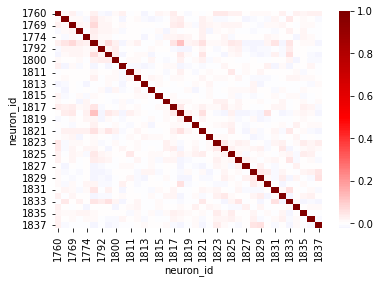

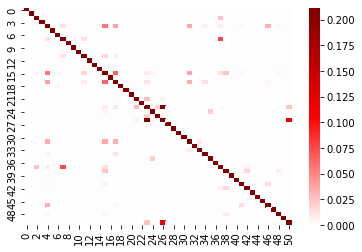

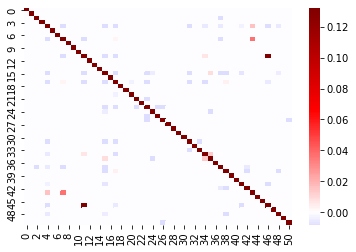

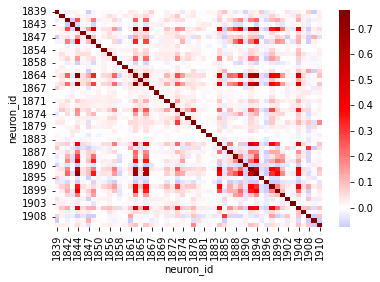

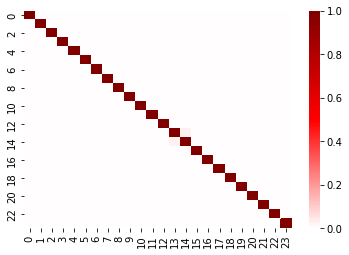

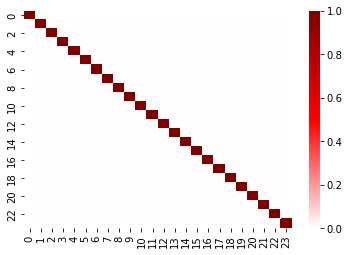

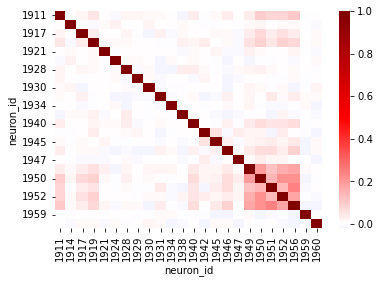

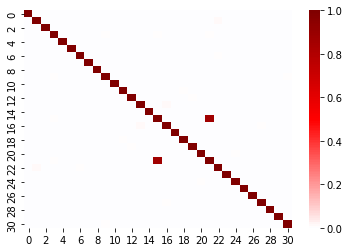

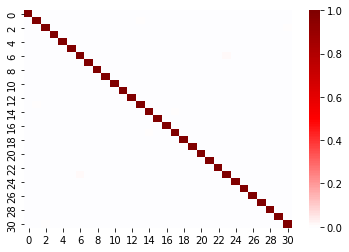

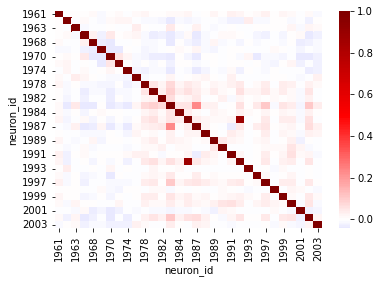

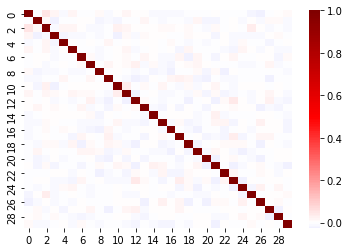

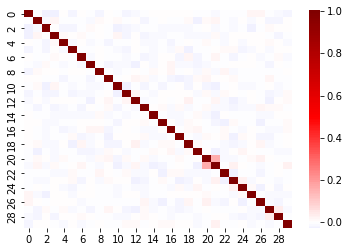

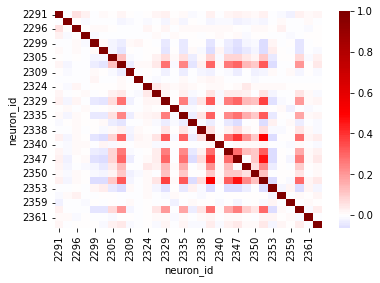

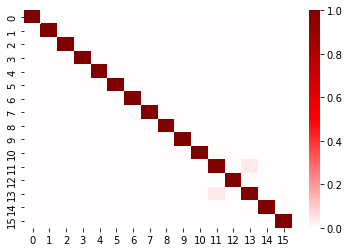

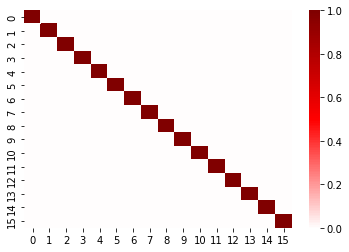

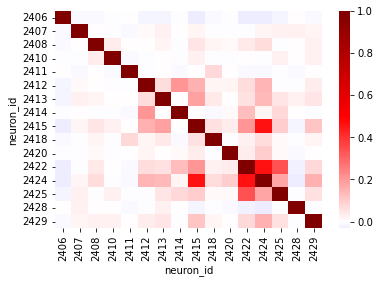

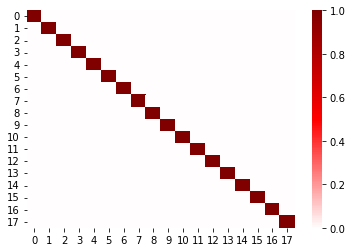

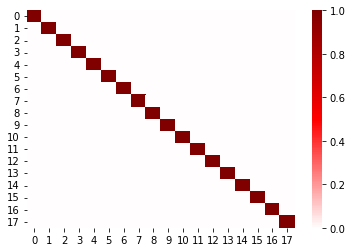

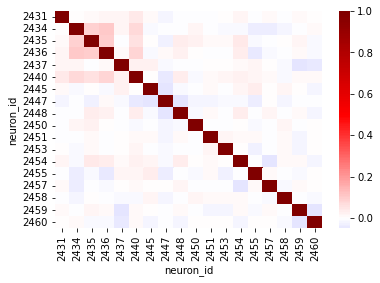

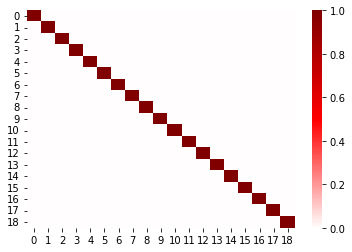

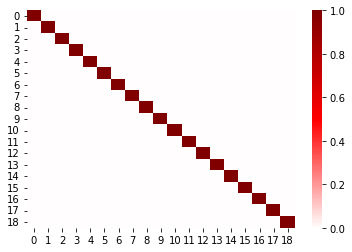

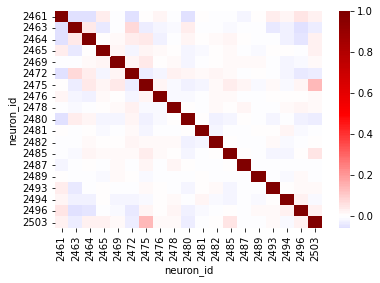

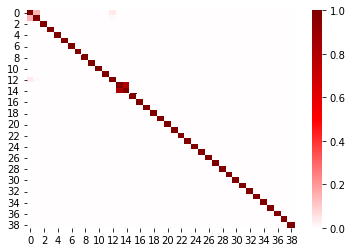

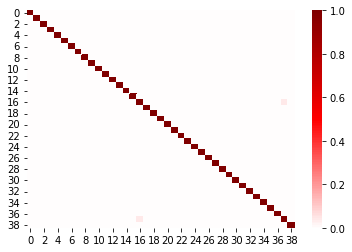

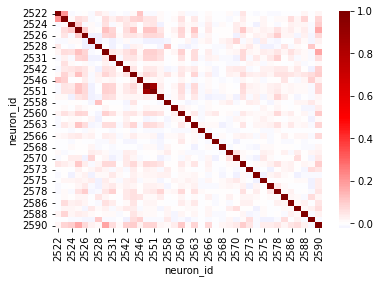

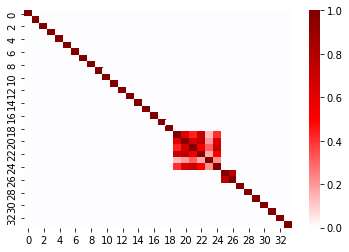

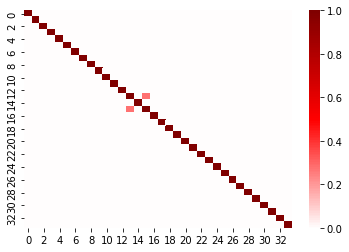

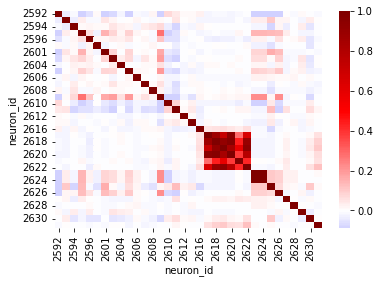

In [28]:
sessions = neurons["session_name"].unique()
session = np.random.choice(sessions)
# session = "hamilton_38"

print(session)
bin_width = 0.05
t_max=600

for session in sessions:
    print(session)
    
    df = get_session_binned_spikes(df_spikes, neurons, session, bin_width=bin_width, t_max=t_max) 
    X = StandardScaler(with_std=True).fit_transform(df.diff().dropna().copy())
    plt.figure()
    res = GraphicalLassoCV(assume_centered=True, alphas=20, n_jobs=10).fit(X)
    # res = GraphicalLassoCV(assume_centered=True, alphas=10, n_jobs=10).fit(X)

    sns.heatmap(res.covariance_, cmap="seismic", center=0,  robust=True)
    plt.figure()
    sns.heatmap(res.precision_, cmap="seismic", center=0,  robust=True)
    plt.figure()
    sns.heatmap(df.corr(),  cmap="seismic", center=0,  robust=True)


acute_01
ESHOCK_03_LOC1
ESHOCK_04_LOC1
ESHOCK_06_LOC1
ESHOCK_07_LOC1
ESHOCK_08_LOC1
ESHOCK_09_LOC1
hamilton_10
hamilton_03
hamilton_04
hamilton_09
hamilton_31
hamilton_38
hamilton_37
hamilton_35
hamilton_36
hamilton_32
acute_15
acute_16
acute_01
acute_14
acute_12
acute_11


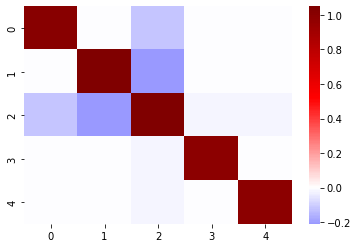

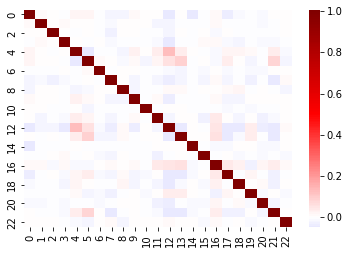

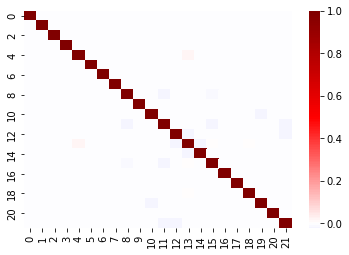

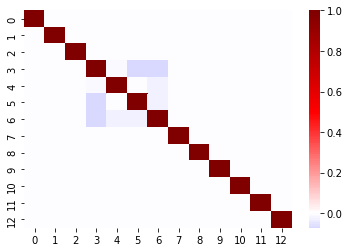

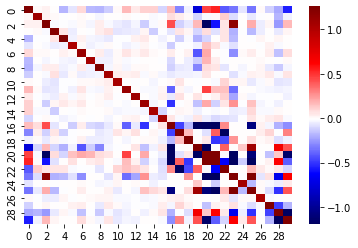

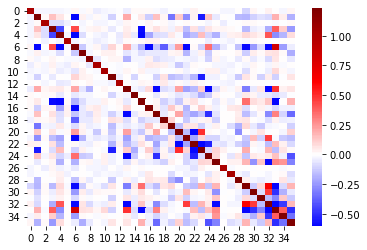

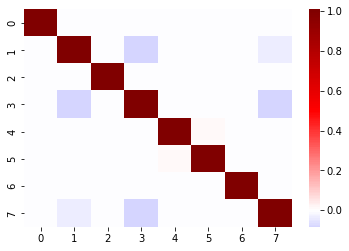

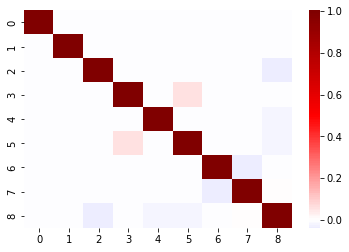

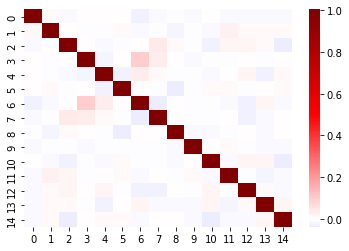

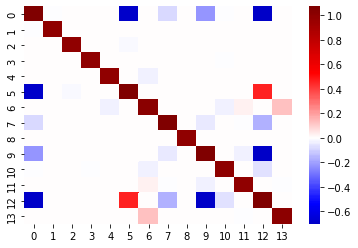

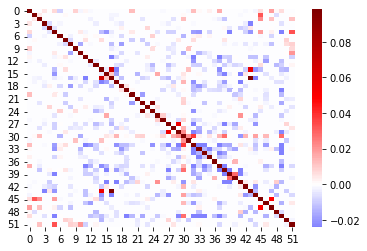

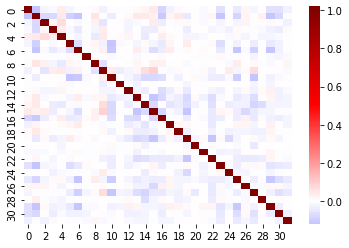

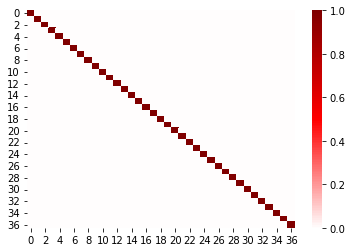

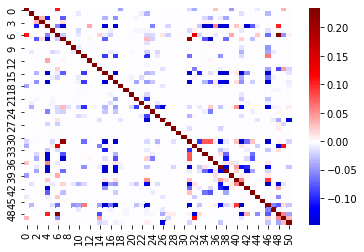

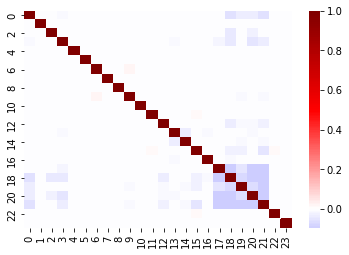

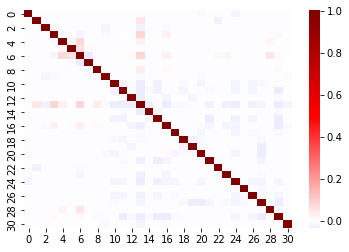

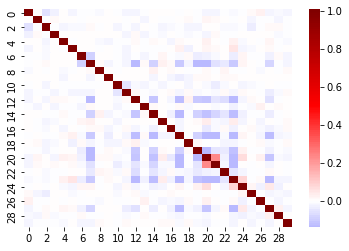

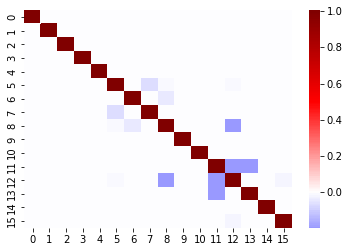

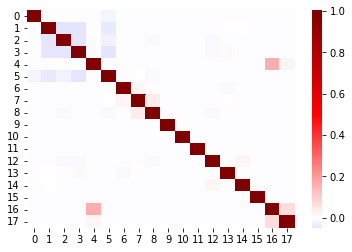

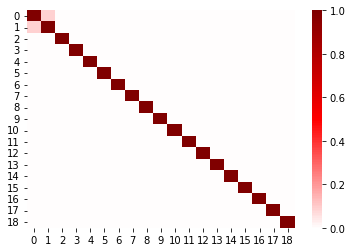

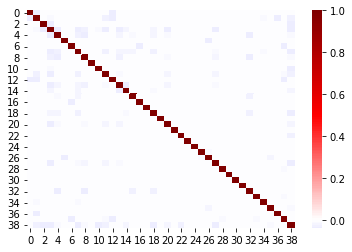

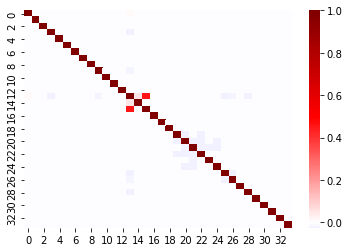

In [29]:
sessions = neurons["session_name"].unique()
session = np.random.choice(sessions)
# session = "hamilton_38"

print(session)
bin_width = 0.05
t_max=600

for session in sessions:
    print(session)
    
    df = get_session_binned_spikes(df_spikes, neurons, session, bin_width=bin_width, t_max=t_max) 
    X = StandardScaler(with_std=True).fit_transform(df.dropna().copy())
    # plt.figure()
    res = GraphicalLassoCV(assume_centered=True, alphas=20, n_jobs=10).fit(X)
    # sns.heatmap(res.covariance_, cmap="seismic", center=0,  robust=True)
    plt.figure()
    sns.heatmap(res.precision_, cmap="seismic", center=0,  robust=True)

    # plt.figure()
    # sns.heatmap(df.corr(),  cmap="seismic", center=0,  robust=True)


acute_11
ESHOCK_03_LOC1
ESHOCK_04_LOC1
ESHOCK_06_LOC1
ESHOCK_07_LOC1
ESHOCK_08_LOC1
error
ESHOCK_09_LOC1
error
hamilton_10
hamilton_03
hamilton_04
hamilton_09
hamilton_31
hamilton_38
hamilton_37
hamilton_35
hamilton_36
hamilton_32
acute_15
acute_16
acute_01
acute_14
acute_12
acute_11


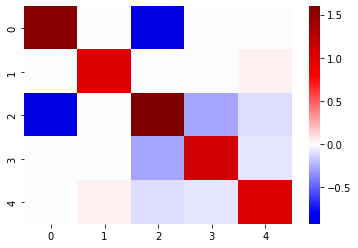

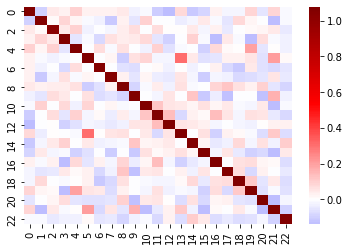

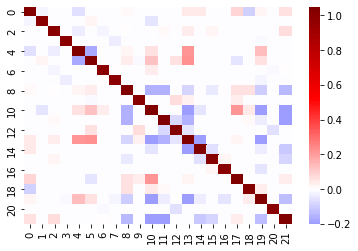

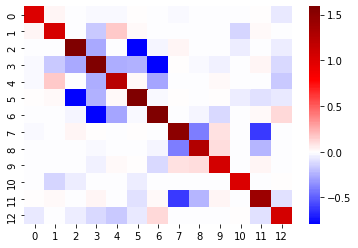

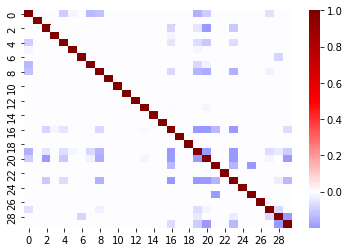

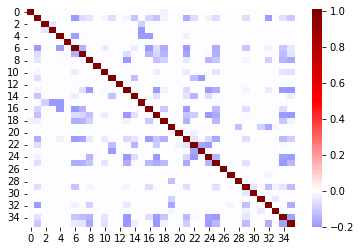

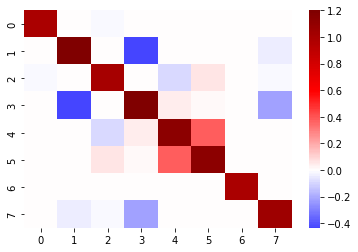

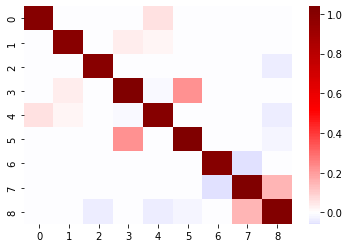

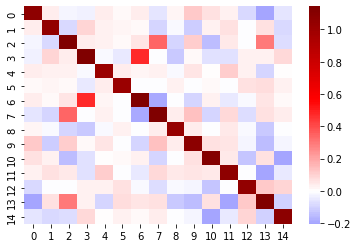

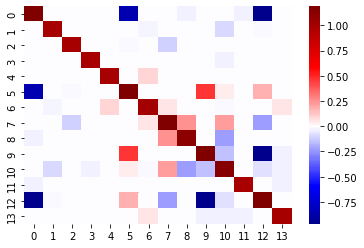

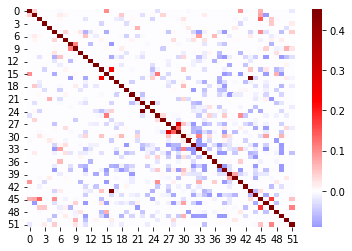

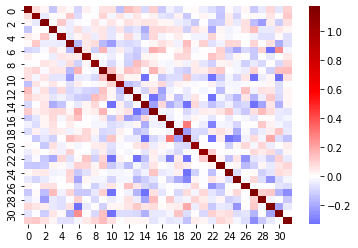

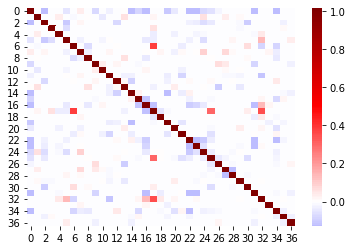

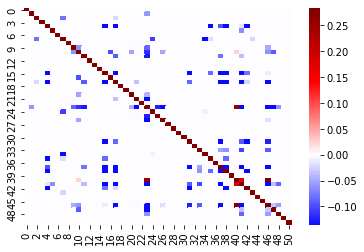

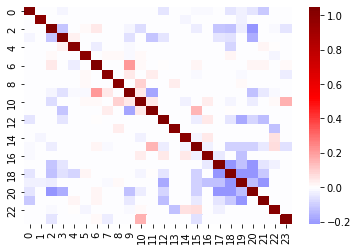

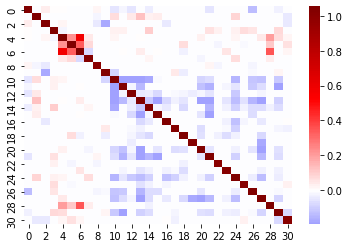

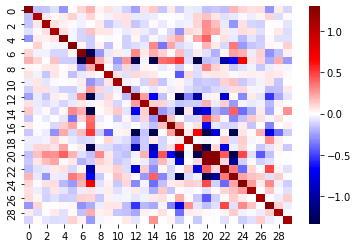

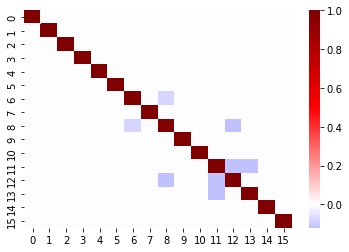

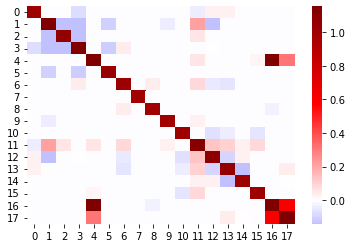

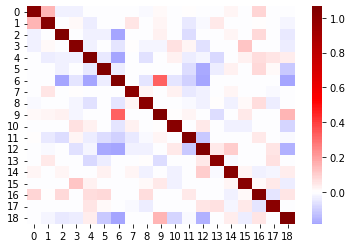

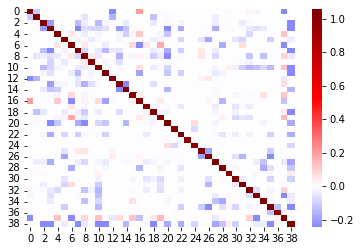

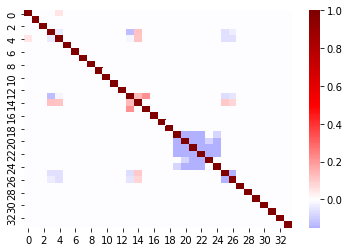

In [30]:
sessions = neurons["session_name"].unique()
session = np.random.choice(sessions)

print(session)
bin_width = 1
t_max=600

for session in sessions:
    print(session)
    
    df = get_session_binned_spikes(df_spikes, neurons, session, bin_width=bin_width, t_max=t_max) 
    X = StandardScaler(with_std=True).fit_transform(df.diff().dropna().copy())
    plt.figure()
    try:
        res = GraphicalLassoCV(assume_centered=True, alphas=5, cv=5).fit(X)
    except:
        print("error")
        res = GraphicalLasso(assume_centered=True, alpha=0.5).fit(X)
    
    sns.heatmap(res.precision_, cmap="seismic", center=0,  robust=True)
    # plt.figure()
    # sns.heatmap(df.diff().dropna().corr(),  cmap="seismic", center=0,  robust=True)


hamilton_04
ESHOCK_03_LOC1
ESHOCK_04_LOC1
ESHOCK_06_LOC1
ESHOCK_07_LOC1
ESHOCK_08_LOC1
ESHOCK_09_LOC1
hamilton_10
hamilton_03
hamilton_04
hamilton_09
hamilton_31
hamilton_38
hamilton_37
hamilton_35
hamilton_36
hamilton_32
acute_15
acute_16
acute_01
acute_14
acute_12
acute_11


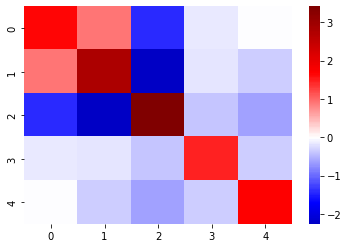

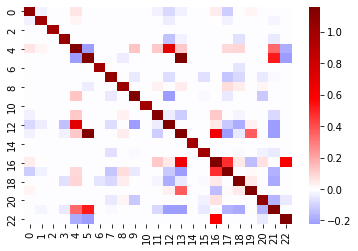

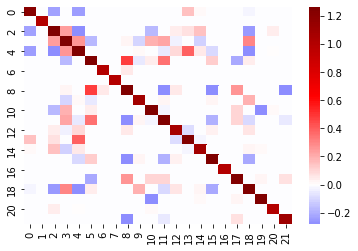

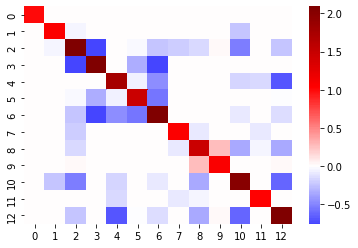

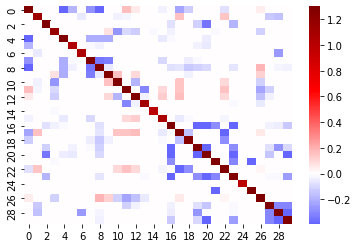

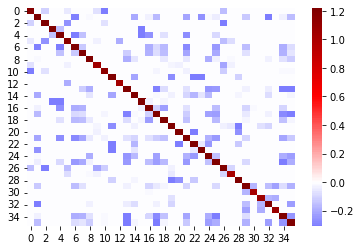

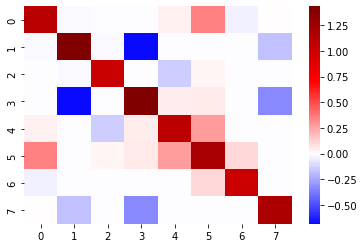

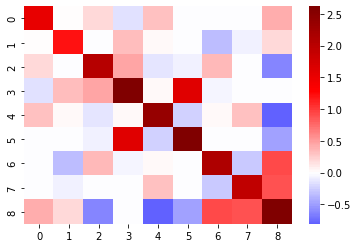

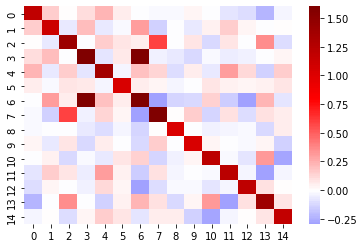

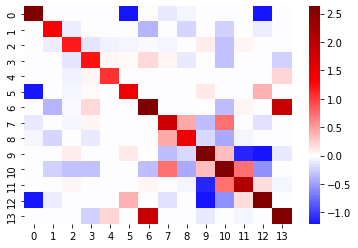

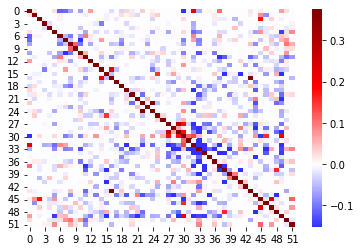

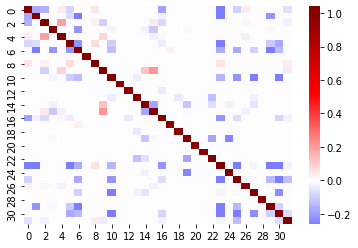

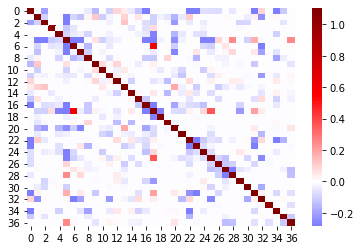

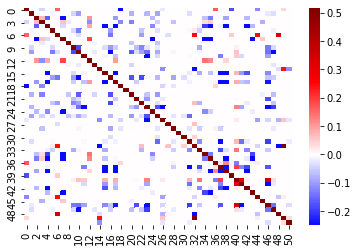

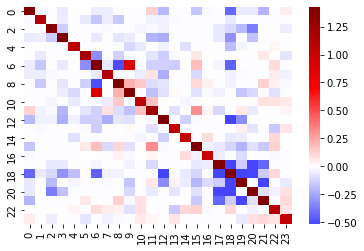

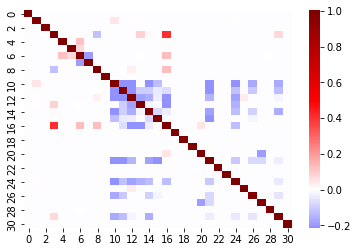

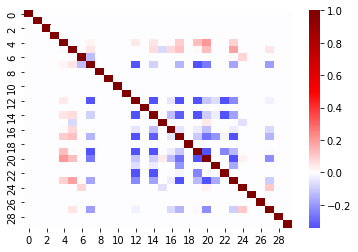

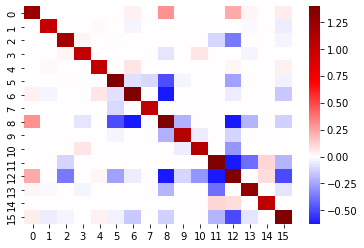

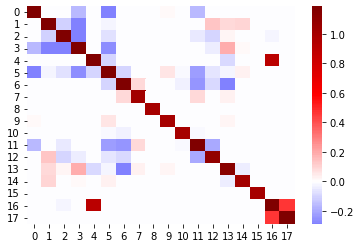

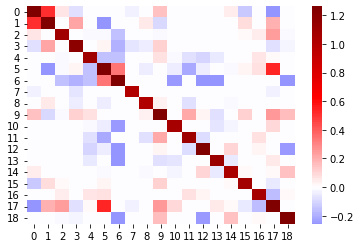

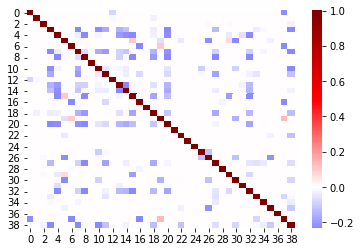

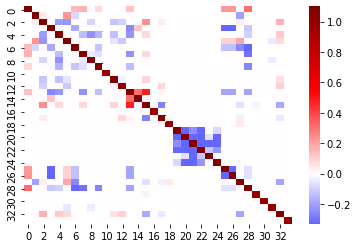

In [31]:
sessions = neurons["session_name"].unique()
session = np.random.choice(sessions)

print(session)
bin_width = 1
t_max=600

for session in sessions:
    print(session)
    
    df = get_session_binned_spikes(df_spikes, neurons, session, bin_width=bin_width, t_max=t_max) 
    X = StandardScaler(with_std=True).fit_transform(df.dropna().copy())
    plt.figure()
    try:
        res = GraphicalLassoCV(assume_centered=True, alphas=5, cv=5).fit(X)
    except:
        print("error")
        res = GraphicalLasso(assume_centered=True, alpha=0.5).fit(X)
    
    sns.heatmap(res.precision_, cmap="seismic", center=0,  robust=True)
    # plt.figure()
    # sns.heatmap(df.dropna().corr(),  cmap="seismic", center=0,  robust=True)


In [50]:
df_sub

neuron_id,2592,2593,2594,2595,2596,2598,2601,2603,2604,2605,...,2622,2623,2624,2625,2626,2627,2628,2629,2630,2634
bin,,,,,,,,,,,,,,,,,,,,,
120,15,9,5,0,19,9,0,3,5,6,...,0,13,13,6,4,0,0,3,1,0
121,15,10,5,0,19,9,0,5,7,6,...,0,14,14,6,5,0,0,2,1,0
122,15,11,3,0,19,8,0,2,7,4,...,0,14,14,5,4,0,0,3,2,0
123,15,9,6,0,18,10,0,2,8,7,...,0,10,10,0,5,0,0,3,1,0
124,13,12,5,0,19,8,0,4,8,4,...,0,14,14,6,4,0,0,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,17,14,2,0,16,7,0,0,3,0,...,0,11,11,0,1,0,0,0,4,0
236,16,18,4,0,16,6,0,0,6,1,...,0,15,15,0,1,0,0,0,9,0
237,18,18,4,0,17,7,0,0,4,2,...,0,14,14,0,0,2,0,0,9,1


ESHOCK_09_LOC1
0
error
120
error


FloatingPointError: The system is too ill-conditioned for this solver. The system is too ill-conditioned for this solver

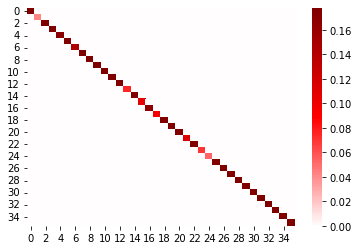

<Figure size 432x288 with 0 Axes>

In [63]:
sessions = neurons["session_name"].unique()
session = sessions[5]
print(session)
bin_width = 0.1
t_max=1800

df = get_session_binned_spikes(df_spikes, neurons, session, bin_width=bin_width, t_max=t_max) 

starts = np.arange(0, 1800, 120)

for start, stop in zip(starts, starts[1:]):
    print(start)

    df_sub = df.loc[lambda x: (x.index >= start) & (x.index < stop)] 
    X = df_sub.dropna().copy()
    plt.figure()
    try:
        res = GraphicalLassoCV(assume_centered=False, alphas=4, cv=5, n_jobs=4).fit(X)
    except:
        print("error")
        res = GraphicalLasso(assume_centered=False, alpha=20, mode="lars").fit(X+ 1)
    
    sns.heatmap(res.precision_, cmap="seismic", center=0,  robust=True)

In [60]:
X

neuron_id,132,135,136,137,138,139,140,142,144,145,...,167,176,177,178,179,180,181,182,184,185
bin,,,,,,,,,,,,,,,,,,,,,
120.0,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
120.1,0,2,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
120.2,0,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
120.3,0,1,0,0,0,0,0,1,1,1,...,0,1,0,0,0,0,0,0,0,0
120.4,1,0,0,0,1,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239.5,0,0,0,0,1,0,0,0,3,0,...,1,1,0,0,0,0,0,0,0,0
239.6,0,3,1,0,0,1,0,1,0,1,...,0,1,0,0,0,0,0,0,0,0
239.7,1,0,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0


In [206]:
df.corr()

neuron_id,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,120,121,122,123,124,125,126,127,128
neuron_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
97,1.000000,0.024977,0.080467,-0.100468,0.616349,0.289823,0.045402,0.446741,0.649003,0.358709,-0.185200,-0.413758,-0.269656,-0.249232,-0.171247,0.320958,0.418248,0.573883,0.380534,0.462184,0.486132,0.077783,0.537546,0.362500,0.123536,0.160549,-0.238434,0.317171,0.471640,0.505161
98,0.024977,1.000000,0.115103,0.201050,0.105201,0.046506,0.136134,0.060804,0.139237,-0.046940,0.224979,0.225834,0.249609,0.079943,0.046219,-0.119211,0.285838,-0.313878,-0.081163,0.308314,0.318470,0.122484,-0.323265,0.276827,0.004842,0.173229,0.124039,0.358106,0.442267,0.349034
99,0.080467,0.115103,1.000000,0.239426,0.299465,0.200661,0.174310,0.136450,0.177033,0.058148,0.080177,0.267963,0.188339,0.152273,0.069172,0.021796,0.499178,0.027548,0.118896,0.523262,0.570673,0.333793,-0.021623,0.559607,-0.011837,0.132401,0.095449,0.131491,0.218527,0.166549
100,-0.100468,0.201050,0.239426,1.000000,-0.041974,0.148554,0.142363,-0.058489,-0.070101,-0.270936,0.368508,0.347417,0.397394,0.147690,0.260042,-0.016747,0.383498,-0.269536,-0.046491,0.330784,0.334363,0.395249,-0.266669,0.406405,0.056252,0.350674,0.216225,0.175901,0.227104,0.159435
101,0.616349,0.105201,0.299465,-0.041974,1.000000,0.291400,0.113320,0.378609,0.507703,0.362704,-0.103353,-0.074062,-0.101445,-0.107071,-0.032817,0.264101,0.509364,0.303746,0.295933,0.530313,0.552253,0.254431,0.232687,0.525594,0.098003,0.185246,-0.130199,0.248984,0.348709,0.330967
102,0.289823,0.046506,0.200661,0.148554,0.291400,1.000000,0.132365,0.171295,0.224608,0.103572,0.017911,-0.035212,0.020517,-0.034962,0.038139,0.168017,0.313882,0.170898,0.149890,0.338430,0.328315,0.161135,0.146826,0.328710,0.019799,0.096160,-0.033965,0.075992,0.160656,0.128814
103,0.045402,0.136134,0.174310,0.142363,0.113320,0.132365,1.000000,0.137523,0.103791,0.102278,0.020959,0.104239,0.026236,-0.023409,-0.027214,-0.047854,0.265720,-0.004743,0.044506,0.358253,0.227566,0.156196,-0.019428,0.259576,-0.018733,0.076431,-0.015056,0.077963,0.349354,0.089583
104,0.446741,0.060804,0.136450,-0.058489,0.378609,0.171295,0.137523,1.000000,0.346933,0.297107,-0.125694,-0.178330,-0.142618,-0.074041,-0.025191,0.213275,0.282024,0.281536,0.224050,0.327237,0.291413,0.097796,0.247732,0.252436,0.069242,0.071005,-0.143401,0.103690,0.215624,0.191372
105,0.649003,0.139237,0.177033,-0.070101,0.507703,0.224608,0.103791,0.346933,1.000000,0.296694,-0.139683,-0.136739,-0.124459,-0.083829,-0.070712,0.180025,0.505926,0.377659,0.306370,0.539211,0.544087,0.168925,0.347354,0.456402,0.078485,0.162320,-0.217297,0.364277,0.445071,0.433323
